In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c7ebe6c7d6989403633ef84fbeb007be


In [3]:
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | akdepe
Processing Record 3 of Set 1 | esperance
Processing Record 4 of Set 1 | geraldton
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | hamilton
Processing Record 8 of Set 1 | nabul
City not found. Skipping...
Processing Record 9 of Set 1 | ixtapa
Processing Record 10 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 11 of Set 1 | bredasdorp
Processing Record 12 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 13 of Set 1 | waipawa
Processing Record 14 of Set 1 | mar del plata
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | bluff
Processing Record 17 of Set 1 | guerrero negro
Processing Record 18 of Set 1 | cabo san lucas
Processing Record 19 of Set 1 | nisia floresta
Processing Record 20 of Set 1 | palabuhanratu
City not found

Processing Record 41 of Set 4 | sibu
Processing Record 42 of Set 4 | ereymentau
Processing Record 43 of Set 4 | tatarbunary
Processing Record 44 of Set 4 | balikpapan
Processing Record 45 of Set 4 | college
Processing Record 46 of Set 4 | puerto el triunfo
Processing Record 47 of Set 4 | awbari
Processing Record 48 of Set 4 | oussouye
Processing Record 49 of Set 4 | tasiilaq
Processing Record 50 of Set 4 | dwarka
Processing Record 1 of Set 5 | ban nahin
Processing Record 2 of Set 5 | berghin
Processing Record 3 of Set 5 | asau
Processing Record 4 of Set 5 | atar
Processing Record 5 of Set 5 | jega
Processing Record 6 of Set 5 | marsa matruh
Processing Record 7 of Set 5 | georgetown
Processing Record 8 of Set 5 | sechura
Processing Record 9 of Set 5 | elizabeth city
Processing Record 10 of Set 5 | port hardy
Processing Record 11 of Set 5 | torbay
Processing Record 12 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 5 | pacific grove
Processing Record 14 of 

Processing Record 36 of Set 8 | deputatskiy
Processing Record 37 of Set 8 | hun
Processing Record 38 of Set 8 | kemijarvi
Processing Record 39 of Set 8 | olafsvik
Processing Record 40 of Set 8 | puerto pinasco
City not found. Skipping...
Processing Record 41 of Set 8 | katangi
Processing Record 42 of Set 8 | salalah
Processing Record 43 of Set 8 | olga
Processing Record 44 of Set 8 | nuuk
Processing Record 45 of Set 8 | severo-kurilsk
Processing Record 46 of Set 8 | westpunt
City not found. Skipping...
Processing Record 47 of Set 8 | port huron
Processing Record 48 of Set 8 | hami
Processing Record 49 of Set 8 | liaozhong
Processing Record 50 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 1 of Set 9 | ilulissat
Processing Record 2 of Set 9 | emilio carranza
Processing Record 3 of Set 9 | kazalinsk
City not found. Skipping...
Processing Record 4 of Set 9 | monzon
Processing Record 5 of Set 9 | prince rupert
Processing Record 6 of Set 9 | tautira
Processing Record 7 

Processing Record 26 of Set 12 | nikolsk
Processing Record 27 of Set 12 | kloulklubed
Processing Record 28 of Set 12 | awjilah
Processing Record 29 of Set 12 | kokopo
Processing Record 30 of Set 12 | tsienyane
City not found. Skipping...
Processing Record 31 of Set 12 | buta
Processing Record 32 of Set 12 | pokhara
Processing Record 33 of Set 12 | ahipara
Processing Record 34 of Set 12 | sakaiminato
Processing Record 35 of Set 12 | xiamen
Processing Record 36 of Set 12 | chicaman
Processing Record 37 of Set 12 | malwan
City not found. Skipping...
Processing Record 38 of Set 12 | diamantina
Processing Record 39 of Set 12 | kendari
Processing Record 40 of Set 12 | laguna
Processing Record 41 of Set 12 | kabo
Processing Record 42 of Set 12 | mbigou
Processing Record 43 of Set 12 | askino
Processing Record 44 of Set 12 | pisco
Processing Record 45 of Set 12 | marcona
City not found. Skipping...
Processing Record 46 of Set 12 | ulladulla
Processing Record 47 of Set 12 | sabha
--------------

In [7]:
print(len(city_data))

550


In [8]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Punta Arenas,-53.15,-70.92,46.4,75,83,34.45,CL,2020-08-19 23:40:36
1,Akdepe,42.06,59.38,69.8,52,0,2.24,TM,2020-08-19 23:45:06
2,Esperance,-33.87,121.90,44.6,100,75,9.17,AU,2020-08-19 23:42:39
3,Geraldton,-28.77,114.60,50.0,81,82,4.70,AU,2020-08-19 23:45:06
4,Vaini,-21.20,-175.20,77.0,88,75,12.75,TO,2020-08-19 23:45:06


In [9]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Punta Arenas,CL,2020-08-19 23:40:36,-53.15,-70.92,46.4,75,83,34.45
1,Akdepe,TM,2020-08-19 23:45:06,42.06,59.38,69.8,52,0,2.24
2,Esperance,AU,2020-08-19 23:42:39,-33.87,121.90,44.6,100,75,9.17
3,Geraldton,AU,2020-08-19 23:45:06,-28.77,114.60,50.0,81,82,4.70
4,Vaini,TO,2020-08-19 23:45:06,-21.20,-175.20,77.0,88,75,12.75


In [10]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

#Export the city_data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

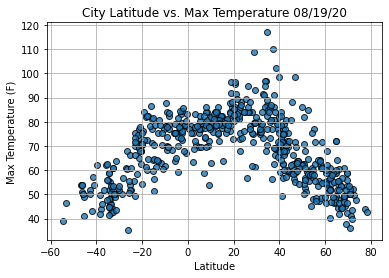

In [13]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor = "black", linewidths = 1, marker = "o", alpha = 0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

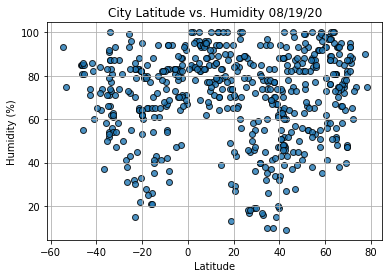

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

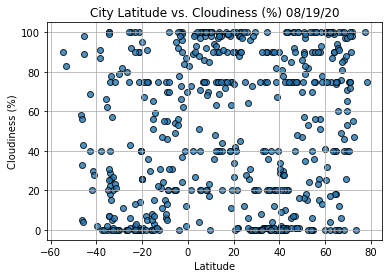

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

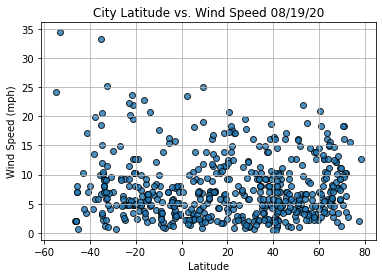

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()